## HousePrice Prediction Model - Regression

In [1]:
# Step 1: Importing neccesary liabraries
import numpy as np 
import pandas as pd 
# data visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
# import warnings to ignore pop-up messages
import warnings
warnings.filterwarnings('ignore')
# Importing Logging create logs to based on Timestamp
from sklearn.linear_model import LogisticRegression

import time
from loguru import logger

### Load the Dataset using Pandas function

In [6]:
data = pd.read_csv('train.csv')
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [ ]:

logger.info("Step 3: Data Preprocessing and Cleaning Started.")
# Evaluate Time 
start_time = time.time()


2025-10-08 12:59:06.855 | INFO     | __main__:<module>:1 - Step 3: Data Preprocessing and Cleaning Started.


### Checking Information of dataset

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Checking Null values

In [11]:
data.columns[data.isnull().sum()/len(data)*100 > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [12]:
data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [14]:
data.drop(columns=['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],axis=1,inplace=True)

### segregate Numerical and Categorical columns 
### Done EDA Exploratory Data Analysis

In [21]:
numerical_col = data.select_dtypes(exclude = 'object').columns
categorical_col = data.select_dtypes(include = 'object').columns

from collections import OrderedDict

stats = [] 

for i in numerical_col:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3-Q1

    numerical_stats = OrderedDict({
        'Feature':i,
        'Count':data[i].count(),
        'Mean':data[i].mean(),
        'Median':data[i].median(),
        'Q1':Q1,
        'Q3':Q3,
        'IQR':IQR,
        'Maximum':data[i].max(),
        'Minimum':data[i].min(),
        'Skewness':data[i].skew(),
        'Kurtosis':data[i].kurt(),
        'Standard Deviation':data[i].std(),
        'Outliers': data[(data[i] < Q1 - 1.5 * IQR) | (data[i] > Q3 + 1.5 * IQR)][i].count()
    })
    stats.append(numerical_stats)
    report =pd.DataFrame(stats)
report

,Feature,Count,Mean,Median,Q1,Q3,IQR,Maximum,Minimum,Skewness,Kurtosis,Standard Deviation,Outliers
0,MSSubClass,1460,56.897260,50.0,20.00,70.00,50.00,190,20,1.407657,1.580188,42.300571,103
1,LotArea,1460,10516.828082,9478.5,7553.50,11601.50,4048.00,215245,1300,12.207688,203.243271,9981.264932,69
2,OverallQual,1460,6.099315,6.0,5.00,7.00,2.00,10,1,0.216944,0.096293,1.382997,2
3,OverallCond,1460,5.575342,5.0,5.00,6.00,1.00,9,1,0.693067,1.106413,1.112799,125
4,YearBuilt,1460,1971.267808,1973.0,1954.00,2000.00,46.00,2010,1872,-0.613461,-0.439552,30.202904,7
5,YearRemodAdd,1460,1984.865753,1994.0,1967.00,2004.00,37.00,2010,1950,-0.503562,-1.272245,20.645407,0
6,BsmtFinSF1,1460,443.639726,383.5,0.00,712.25,712.25,5644,0,1.685503,11.118236,456.098091,7
7,BsmtUnfSF,1460,567.240411,477.5,223.00,808.00,585.00,2336,0,0.920268,0.474994,441.866955,29
8,TotalBsmtSF,1460,1057.429452,991.5,795.75,1298.25,502.50,6110,0,1.524255,13.250483,438.705324,61
9,1stFlrSF,1460,1162.626712,1087.0,882.00,1391.25,509.25,4692,334,1.376757,5.745841,386.587738,20


### Drop Columns where IQR==0 :- they have no variation (all values are the same)

In [18]:
data.drop(columns = ['Id','BsmtFinSF2', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 
                   'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'],
        axis = 1,inplace = True)

In [19]:
data.shape

(1460, 52)

### check the columns where IQR = 0

In [ ]:
'''columns_with_iqr_zero = report.loc[report['IQR'] == 0, 'Feature'].tolist()

print(columns_with_iqr_zero)
'''

[]


### Statistics for SalePrice using graph

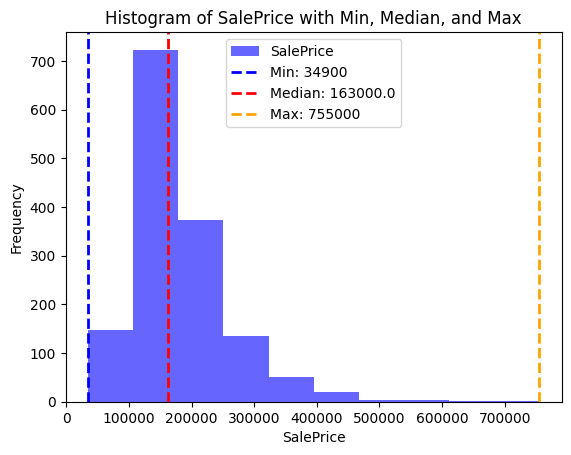

In [25]:
# Calculate statistics for SalePrice
median_value = data['SalePrice'].median()
min_value = data['SalePrice'].min()
max_value = data['SalePrice'].max()

# histogram 
data['SalePrice'].plot(kind='hist',color ='blue',alpha=0.6, label='SalePrice')
# Add vertical lines for min, median, and max
plt.axvline(min_value, color='blue', linestyle='--', linewidth=2, label=f'Min: {min_value}')
plt.axvline(median_value, color='red', linestyle='--', linewidth=2, label=f'Median: {median_value}')
plt.axvline(max_value, color='orange', linestyle='--', linewidth=2, label=f'Max: {max_value}')

# Labels and title
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.title('Histogram of SalePrice with Min, Median, and Max')
plt.legend()

plt.show()


# Pipeline
### notes 
* points to why use pipeline

In [ ]:

from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

# Separate target column
y = np.log1p(data["SalePrice"])
X = data.drop("SalePrice", axis=1)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing pipelines
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=200, random_state=42))
])

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
pipeline.fit(X_train, y_train)

# Evaluate
y_pred = pipeline.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)

print(r2_score(y_val,y_pred))

0.8895508466011509


### Q.  predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.


In [34]:

from sklearn.linear_model import LinearRegression
X = data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = data['SalePrice']                               

# Handle missing values (if any) contain in this columns
X = X.fillna(X.median())
y = y.fillna(y.median())

# Split data into training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict house prices
y_pred = model.predict(X_test)

# Evaluate accuracy 
print("R² Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


result = pd.DataFrame({'GrLivArea':[1500], 'BedroomAbvGr':[3], 'FullBath':[2]})
predicted_price = model.predict(result)
print(r"\nPredicted House Price for Result:", predicted_price[0])

R² Score: 0.6341189942328371
MAE: 35788.061292436294
RMSE: 52975.71771338122
\nPredicted House Price for Result: 188364.36129123066


### using Scatter plot to show relation between independent and dependnt column

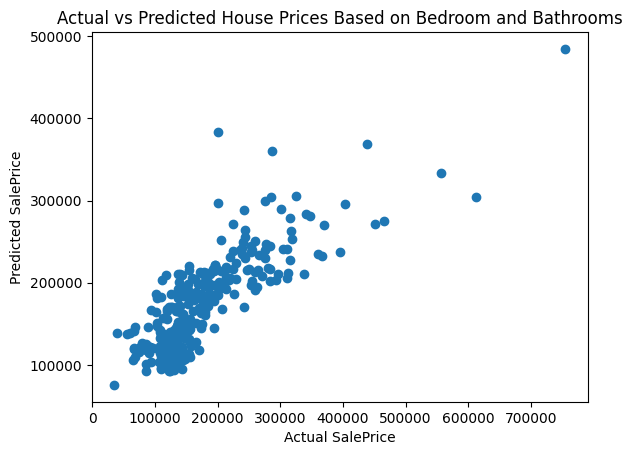

In [35]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted House Prices Based on Bedroom and Bathrooms')
plt.show()

In [40]:
logger.info('completed the task')
end_time = time.time()-start_time
end_time

2025-10-08 12:59:57.002 | INFO     | __main__:<module>:1 - completed the task


50.14492630958557